# Breve Análise Sobre Realizações da Prefeitura no Período 2012-2016

Lucas N Ribeiro

### Introdução

Os dados disponibilizados na planilha são referentes às obras da Prefeitura de Fortaleza no período de 2012 a 2016. Eles estão disponíveis neste link: http://dados.fortaleza.ce.gov.br/catalogo/dataset/realizacoes-da-prefeitura-municipal-entre-2012-2016

### Resultados e Análise

Na primeira parte deste notebook, mostramos através de um gráfico de barras a quantidade absoluta de obras do tipo
* 'Saúde',
* 'Esporte e Lazer',
* 'Urbanismo e Meio Ambiente',
* 'Mobilidade',
* 'Tecnologia e Inovação',
* 'Educação',
* 'Obras',
* 'Cultura',
* 'Desenvolvimento Econômico',
* 'Governo e Sociedade',
* 'Habitação',
* 'Juventude',
* 'Meio Ambiente'

Em seguida, a quantidade relativa de obras é mostrada em um pie chart. Observa-se que a maior parte das obras (83,42%) se concentra nos tipos Saúde, Esporte e Lazer, Urbanismo e Meio Ambiente, e Mobilidade. 

Na segunda parte, a distribuição espacial dessas obras no espaço urbano de Fortaleza é analisada. Observa-se que o conjunto de todas as obras está uniformemente distribuído na cidade. Os 4 principais tipos de obras exceto Mobilidade está uniformemente distribuído. Observa-se que as obras de Mobilidade se concentram na zona norte de Fortaleza, principalmente na Avenida Antonio Sales e no bairro Aldeota/Meireles.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from ipyleaflet import Map, Marker, Circle, TileLayer # https://github.com/ellisonbg/ipyleaflet

# set plotting style
matplotlib.style.use('ggplot')

In [2]:
# read data from xls file and show its properties
data = pd.read_excel('./data/dadosrealizacoes.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
Nome         398 non-null object
Descrição    398 non-null object
Latitude     398 non-null object
Longitude    398 non-null object
Tipo         398 non-null object
dtypes: object(5)
memory usage: 15.6+ KB


In [3]:
# data preprocessing

# replace commas by dots and convert latitudes and longitudes to float
def fixcomma(txt):
    if type(txt) is str:
        return txt.replace(',','.')
    else:
        return txt

data['Latitude'] = data['Latitude'].apply(fixcomma).astype(float)
data['Longitude'] = data['Longitude'].apply(fixcomma).astype(float)


data.head()

,Nome,Descrição,Latitude,Longitude,Tipo
0,Parquinho Amigo da Criança,Praça do Trem - Parquinho Amigo da Criança,-3.780073,-38.513191,Esporte e Lazer
1,Programa Segundo Tempo do bairro Aerolândia,Programa Segundo Tempo do bairro Aerolândia,-3.773602,-38.512515,Esporte e Lazer
2,Abraça Fortaleza,Abraça Fortaleza - prestação de serviços a com...,-3.771231,-38.530314,Governo e Sociedade
3,Posto de Saúde,Posto de Saúde,-3.760524,-38.526976,Saúde
4,Obra de Restauro,Restauro do Mercado da Aerolândia,-3.776398,-38.528044,Urbanismo e Meio Ambiente


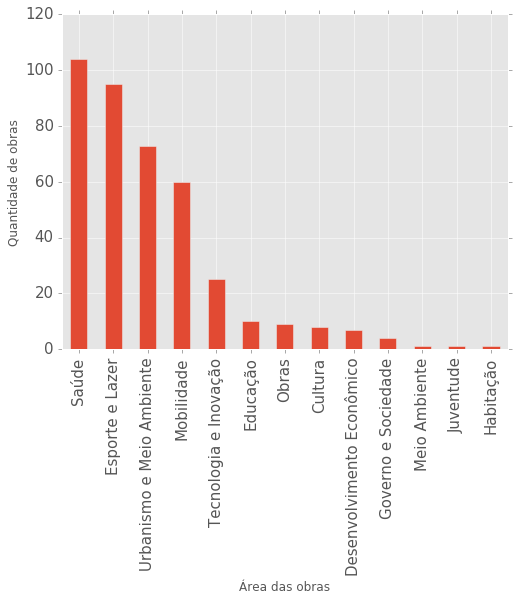

In [4]:
plt.figure()
ax = data['Tipo'].value_counts().plot.bar(figsize=(8,6), fontsize=15)
ax.set_xlabel('Área das obras')
ax.set_ylabel('Quantidade de obras')

Pode-se ver que maior parte das obras se concentram nas áreas da Saúde, Esporte e Lazer, Urbanismo e Meio Ambiente, e Mobilidade. 

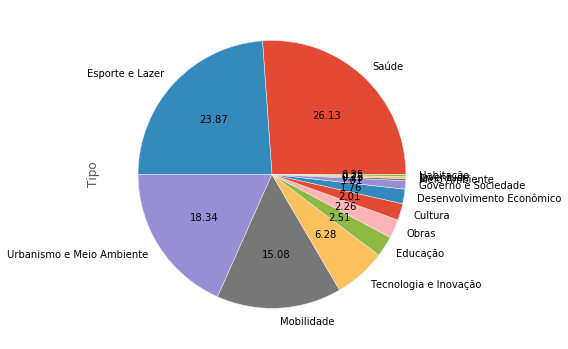

In [5]:
# maybe a pie plot is more adapted to the data?
plt.figure()
ax = data['Tipo'].value_counts().plot.pie(figsize=(6,6), fontsize=10, autopct='%.2f')

In [6]:
def plot_mapa(query, circle_color='#000'):

    # set up map
    center = data.iloc[0][['Latitude','Longitude']].tolist()
    zoom = 11
    m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)

    # query data
    query = data.query(query)

    # create circles and append to the map
    for index, row in query.iterrows():
        location = row[['Latitude','Longitude']].tolist()
        c = Circle(location=row[['Latitude','Longitude']].tolist(),
                   radius = 60,
                   weight = 1,
                   color = circle_color,
                   opacity = 1.0,
                   fill_opacity = 1.0,
                   fill_color = circle_color)
        m.add_layer(c)

    # display map
    return m

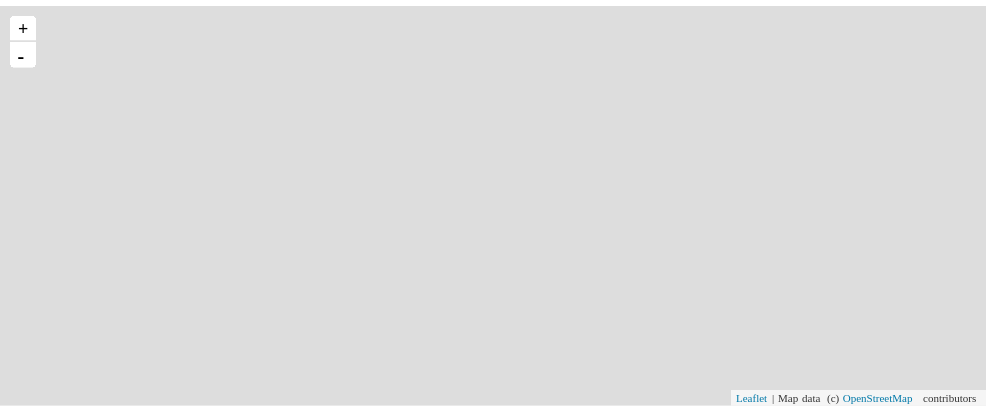

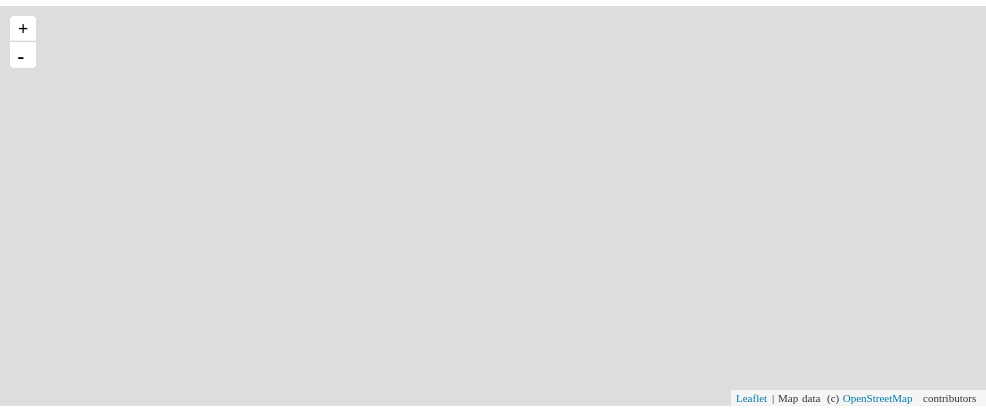

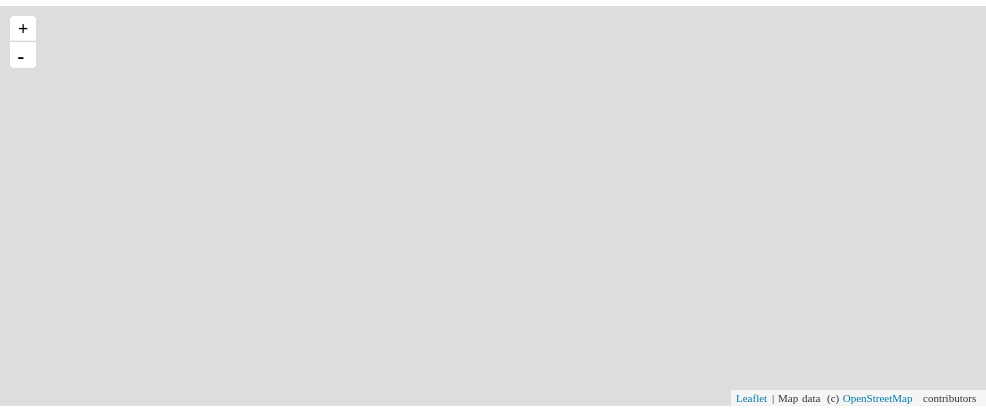

In [7]:
plot_mapa("Tipo != '*'",circle_color='#00F') # Todas as obras

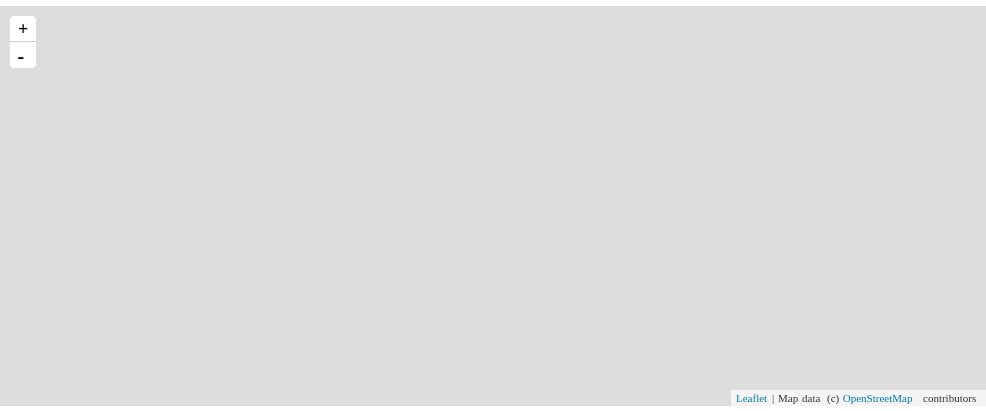

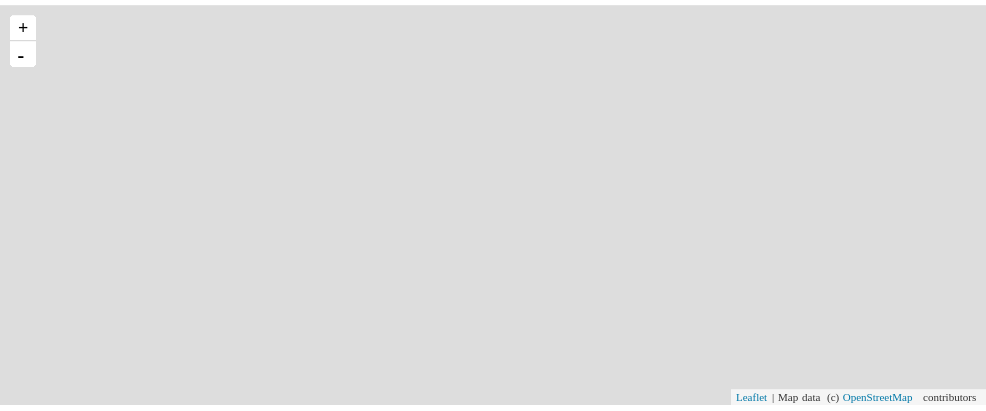

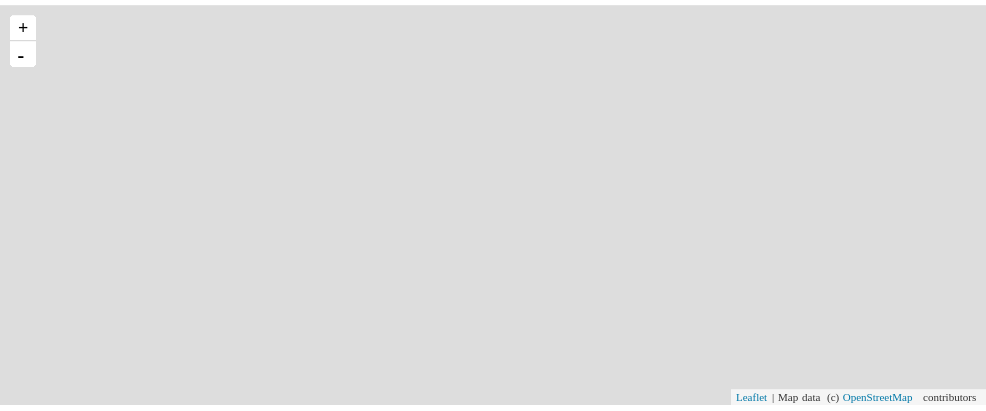

In [8]:
plot_mapa("Tipo == 'Saúde'",circle_color='#F00')

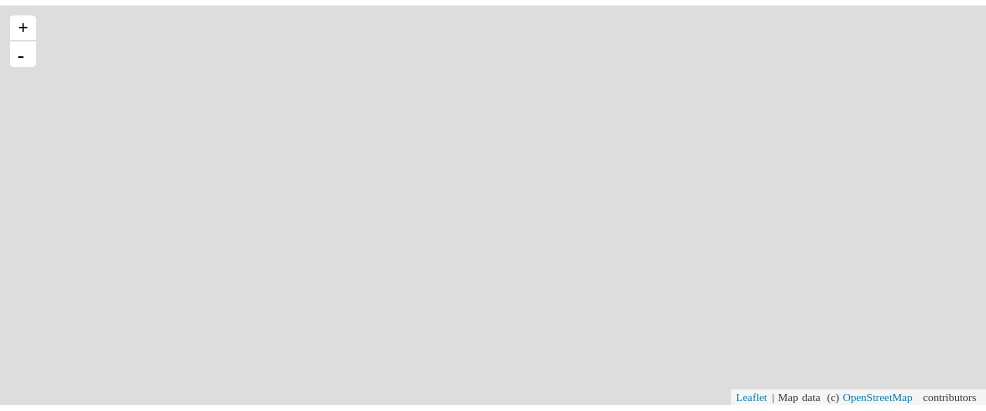

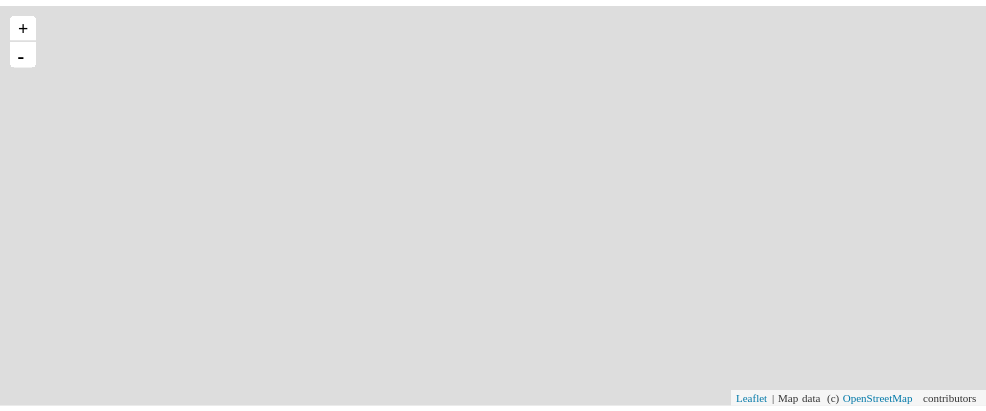

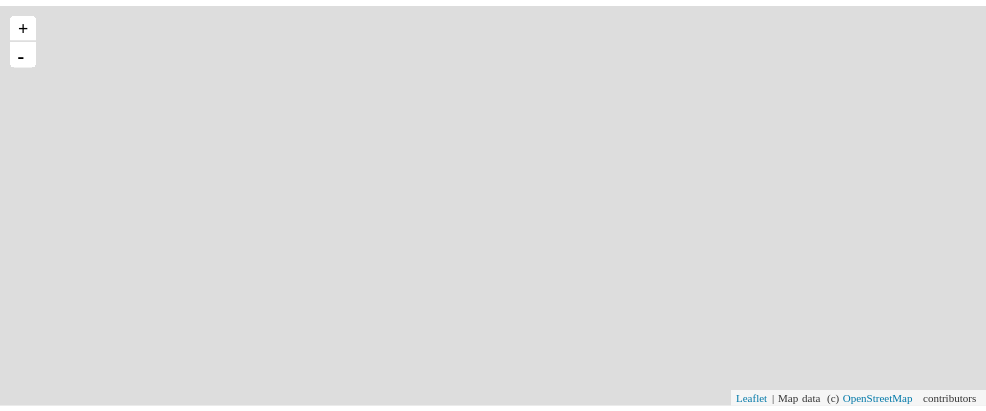

In [9]:
plot_mapa("Tipo=='Esporte e Lazer'")

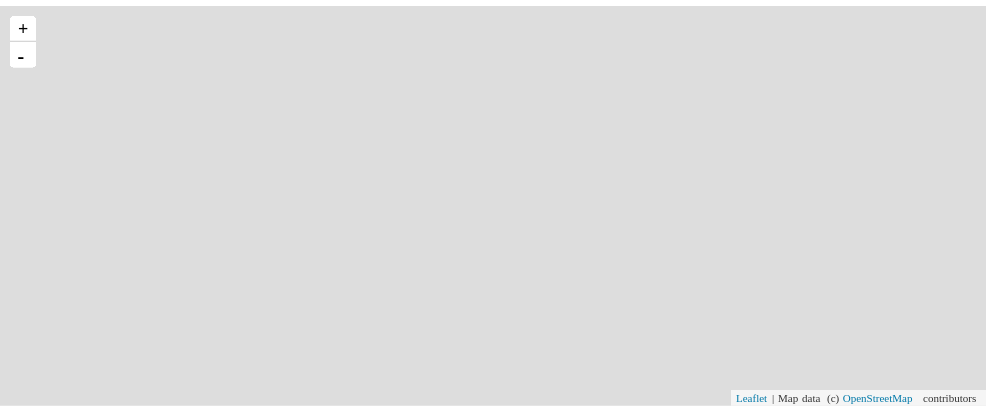

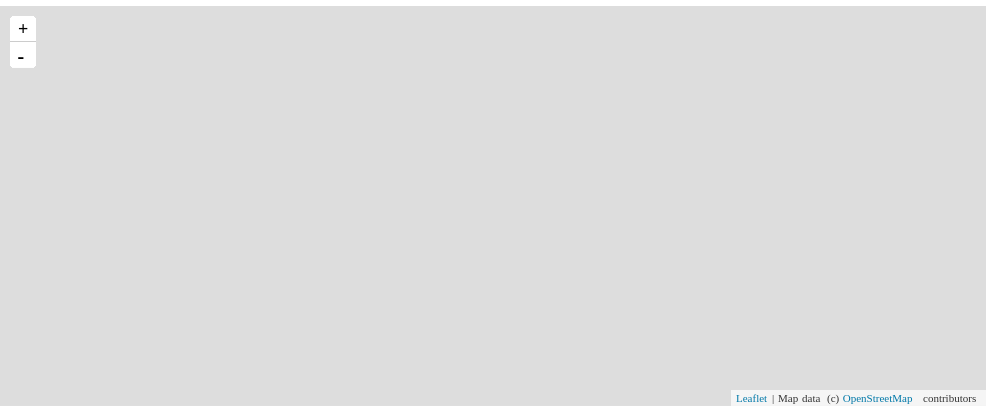

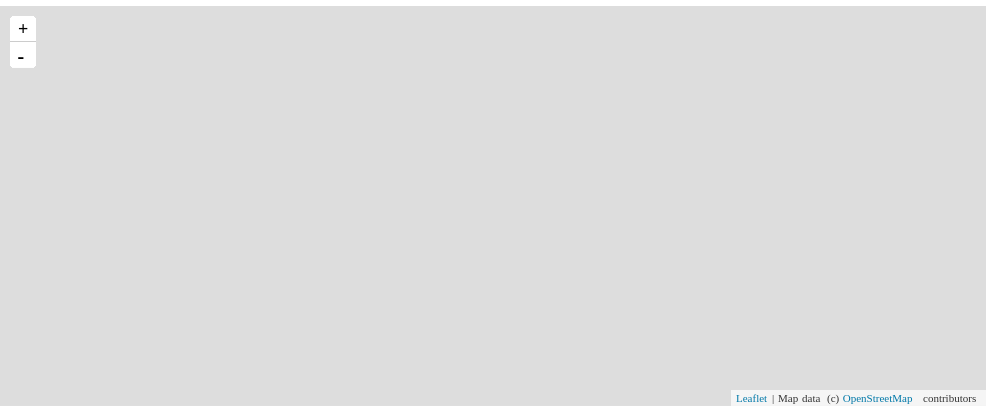

In [10]:
plot_mapa("Tipo == 'Urbanismo e Meio Ambiente'")

In [11]:
data.query("Tipo == 'Urbanismo e Meio Ambiente'")

,Nome,Descrição,Latitude,Longitude,Tipo
4,Obra de Restauro,Restauro do Mercado da Aerolândia,-3.776398,-38.528044,Urbanismo e Meio Ambiente
7,Drenagem urbana,DRENURB - Drenagem Urbana na Rua Carlos Vascon...,-3.733499,-38.511009,Urbanismo e Meio Ambiente
56,Reforma de Praças,Reforma da Praça do Mirante,-3.719871,-38.473627,Urbanismo e Meio Ambiente
57,Drenagem urbana,DRENURB - Drenagem Urbana na Macrodrenagem do ...,-3.796963,-38.508506,Urbanismo e Meio Ambiente
58,Drenagem urbana,DRENURB - Drenagem Urbana na Rua Francisco Vil...,-3.798581,-38.512154,Urbanismo e Meio Ambiente
59,Drenagem urbana,DRENURB - Drenagem Urbana nas Ruas do Parque J...,-3.804526,-38.597116,Urbanismo e Meio Ambiente
63,Sistemas de transporte e trânsito coletivos ur...,Ponte Monte Pascoal,-3.807591,-38.594319,Urbanismo e Meio Ambiente
75,Reforma de Praças,Reforma da Praça dos Leões,-3.726915,-38.526214,Urbanismo e Meio Ambiente
78,Obra de Requalificação,Requalificação do Passeio Público,-3.722652,-38.528504,Urbanismo e Meio Ambiente
79,Obra de Revitalização,Revitalização do Jardim do Paço Municipal,-3.725186,-38.523579,Urbanismo e Meio Ambiente


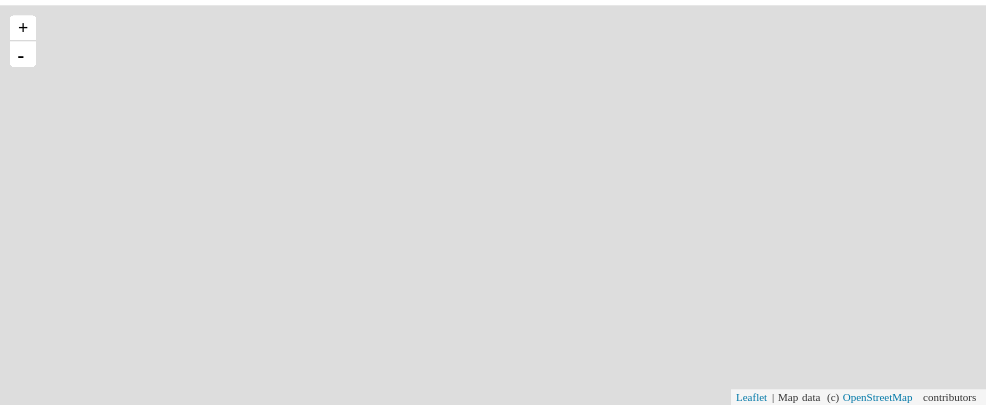

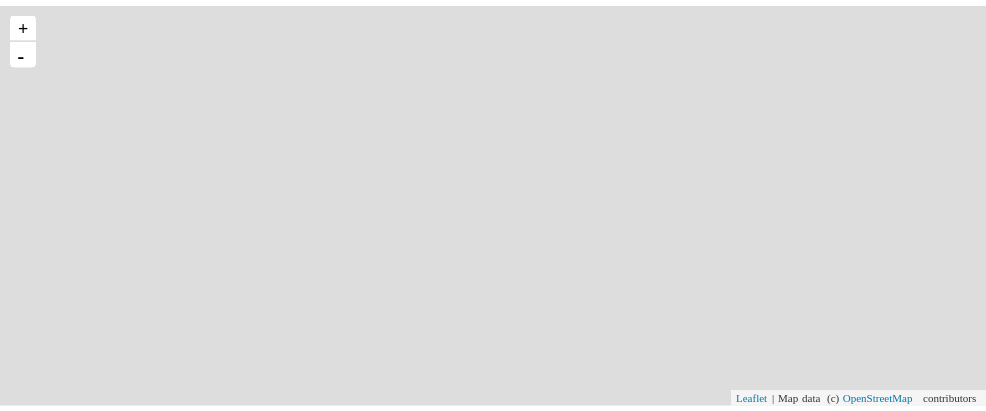

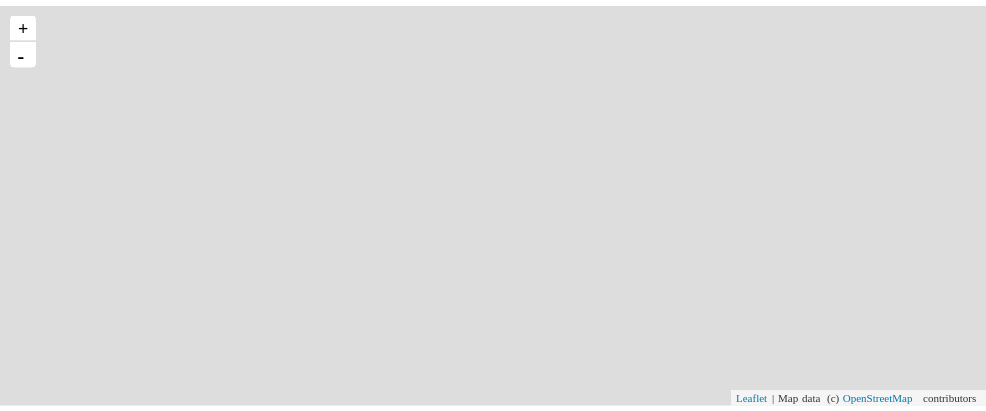

In [12]:
plot_mapa("Tipo == 'Mobilidade'")

In [13]:
data.query("Tipo == 'Mobilidade'")

,Nome,Descrição,Latitude,Longitude,Tipo
6,Sistemas de transporte e trânsito coletivos ur...,Bilhete Único,-3.770094,-38.544920,Mobilidade
8,Sistemas de transporte e trânsito coletivos ur...,Melhorias Viárias na Rua Carlos Vasconcelos,-3.734135,-38.511091,Mobilidade
12,Sistemas de transporte e trânsito coletivos ur...,Binário Aldeota,-3.734055,-38.494945,Mobilidade
13,Sistemas de transporte e trânsito coletivos ur...,Túnel da Av. Engenheiro Santana Jr.,-3.743462,-38.491669,Mobilidade
15,Melhorias Viárias na Rua Carlos Vasconcelos,Melhorias Viárias na Rua Carlos Vasconcelos,-3.734135,-38.511091,Mobilidade
17,Sistemas de transporte e trânsito coletivos ur...,Viaduto da Av. Raul Barbosa,-3.763889,-38.508746,Mobilidade
18,Sistemas de transporte e trânsito coletivos ur...,Melhorias viárias no Amadeu Furtado,-3.742335,-38.554800,Mobilidade
19,Sistemas de transporte e trânsito coletivos ur...,Binário do Rodolfo Teófilo,-3.749116,-38.560060,Mobilidade
20,Melhorias viárias no Amadeu Furtado,Melhorias viárias no Amadeu Furtado,-3.742335,-38.554800,Mobilidade
51,Reforma de equipamento,Reforma Terminal do Siqueira,-3.794060,-38.591813,Mobilidade


In [14]:
data['Tipo'].value_counts().index.tolist()

['Saúde',
 'Esporte e Lazer',
 'Urbanismo e Meio Ambiente',
 'Mobilidade',
 'Tecnologia e Inovação',
 'Educação',
 'Obras',
 'Cultura',
 'Desenvolvimento Econômico',
 'Governo e Sociedade',
 'Meio Ambiente',
 'Juventude',
 'Habitação']